(200, 200, 200)
(200, 200, 200)
(50, 200, 200)
(50, 200, 200)
datos de entrenamiento (400, 200, 200, 1)
datos de validacion (100, 200, 200, 1)
(400,)
(100,)
kernel 10
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 97, 97, 512)       25600     
_________________________________________________________________
activation (Activation)      (None, 97, 97, 512)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 512)       2359808   
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 512)       0         
_________________________________________________________________
max_pooling2d_1 (MaxP

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


20/20 [==============================] - 3s 95ms/step - loss: 0.9327 - accuracy: 0.6050 - val_loss: 0.7238 - val_accuracy: 0.5000
Epoch 2/30
20/20 [==============================] - 2s 86ms/step - loss: 0.6354 - accuracy: 0.7050 - val_loss: 0.6494 - val_accuracy: 0.7300
Epoch 3/30
20/20 [==============================] - 2s 87ms/step - loss: 0.5339 - accuracy: 0.7825 - val_loss: 0.4961 - val_accuracy: 0.9000
Epoch 4/30
20/20 [==============================] - 2s 89ms/step - loss: 0.3473 - accuracy: 0.9025 - val_loss: 0.3500 - val_accuracy: 0.9400
Epoch 5/30
20/20 [==============================] - 2s 89ms/step - loss: 0.1953 - accuracy: 0.9800 - val_loss: 0.2714 - val_accuracy: 0.9400
Epoch 6/30
20/20 [==============================] - 2s 89ms/step - loss: 0.1344 - accuracy: 0.9950 - val_loss: 0.2255 - val_accuracy: 0.9500
Epoch 7/30
20/20 [==============================] - 2s 89ms/step - loss: 0.1019 - accuracy: 1.0000 - val_loss: 0.1826 - val_accuracy: 0.9800
Epoch 8/30
20/20 [======

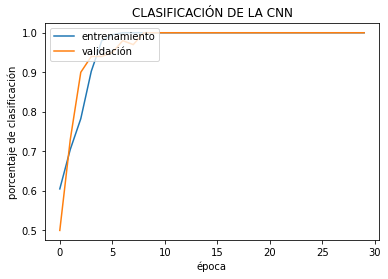

In [12]:
from __future__ import print_function
import keras
from keras import backend as K
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import numpy as np
from matplotlib import pyplot as plt
import scipy.io
from keras import activations
from keras.callbacks import ModelCheckpoint,History
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import binary_crossentropy
import scipy.io
import h5py
from keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

izquierda_train = np.load('izquierda.npy')
izquierda_val =   np.load('izquierda_val.npy')
derecha_train =   np.load('derecha.npy')
derecha_val =     np.load('derecha_val.npy')

print(izquierda_train.shape)
print(derecha_train.shape)
print(izquierda_val.shape)
print(derecha_val.shape)
l_train,a,b=izquierda_train.shape
l_test,a,b=izquierda_val.shape

x_train=np.concatenate((izquierda_train,derecha_train),axis=0)
x_train = np.expand_dims(x_train, axis=3)
print("datos de entrenamiento",x_train.shape)


x_test=np.concatenate((izquierda_val,derecha_val),axis=0)
x_test = np.expand_dims(x_test, axis=3)
print("datos de validacion",x_test.shape)


y0_train=np.zeros(l_train)
y1_train=np.ones (l_train)
y0_test =np.zeros(l_test )
y1_test =np.ones (l_test )
y_train=np.concatenate((y0_train,y1_train),axis=0)
y_test =np.concatenate((y0_test, y1_test ),axis=0)

print(y_train.shape)
print(y_test.shape)


a,b,c,d=x_test.shape

validation=[]
img_width, img_height =b,c
channels=d
epochs = 30#*i+2
batch_size = 20

 
if K.image_data_format() == 'channels_first':
    input_shape = (channels, img_width, img_height)
else:
    input_shape = (img_width, img_height, channels)

for i in range(10,11,1):
    print("kernel",i)
    
    """mejor arquitectura
    
    capa 1: (7,7)
    capa 2: (3,3)
    capa 3: (1,1)
    capa 4: (2,2)
    """
    
    model = Sequential()  
    #capa 1
    k_1=7
    k_2=3
    k_3=1
    k_4=2
        
    model.add(Conv2D(512, (k_1,k_1), strides=(2, 2), padding='valid',input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D( pool_size=(2,2)))    
    #capa 2
    model.add(Conv2D(512, (k_2,k_2), strides=(2, 2),  padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1, 1)))
    #capa 3
    model.add(Conv2D(256, (k_3, k_3), strides=(2, 2),  padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1, 1)))
    #capa 4
    model.add(Conv2D(256, (k_4, k_4), strides=(2, 2),  padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #capa 5
    model.add(Flatten())
    model.add(Dense(1024,activity_regularizer=l2(0.0001)))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.4))
    #capa 6
    model.add(Dense(1, activation='sigmoid', name='preds'))
    model.summary()
    # initiate RMSprop optimizer
    opt=keras.optimizers.Adam(lr=0.0001)
    # Let's train the model using RMSprop
    model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    
    # checkpoint
    # filepath="model_al.hdf5"
    # checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    # callbacks_list = [checkpoint]
    
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    
    # Fit the model
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              # callbacks=callbacks_list,
              verbose=1)
    
    #  "Accuracy"
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("CLASIFICACIÓN DE LA CNN")
    plt.ylabel('porcentaje de clasificación')
    plt.xlabel('época')
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    plt.show()
    
    validation.append(np.amax(history.history['val_accuracy']))
    K.clear_session()

#model.save ("modelo.h5") #
#model.save_weights("Pesos.h5")

In [15]:
model.save("modelomanos100.h5")

In [16]:
model.save_weights("pesosmanos100.h5")